In [410]:
import numpy as np
import matplotlib.pyplot as plt

# T1

In [411]:
def f(x):
    return x**3-5*x+3

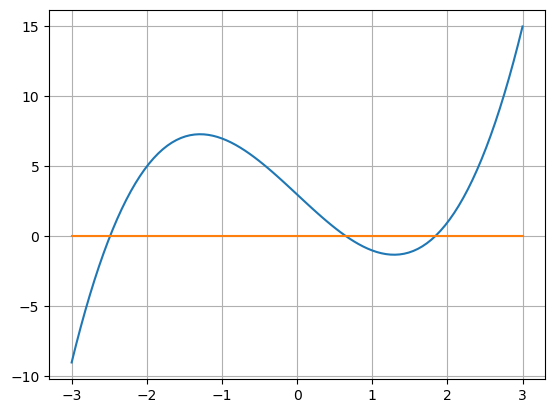

In [412]:
x = np.linspace(-3,3,100)

plt.grid(True)
plt.plot(x,f(x))
plt.plot(x,x*0)

In [413]:
f(0),f(1),f(2)# (0,1),(1,2)之间各有一个正根

(3, -1, 1)

In [414]:
# 第一问，用二分法找根的大概位置

def bisection(a,b,n):
    '''a,b为区间起止点，n为迭代次数'''
    x1 = min(a,b)
    x2 = max(a,b)
    
    if f(x1)*f(x2)<0:
        for i in range(n):
            x0 = (x1+x2)*0.5
            if f(x0)*f(x1)<0:
                x1 = x1
                x2 = x0
            else:
                x1 = x0
                x2 = x2
        return x0
    else:
        pass

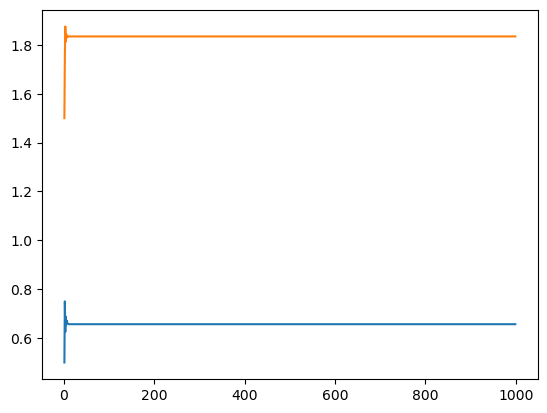

In [415]:
n_array = np.arange(1,1000)
x1_array = np.array([])
x2_array = np.array([])

for n in n_array:
    x1_array = np.append(x1_array,bisection(0,1,n))
    x2_array = np.append(x2_array,bisection(1,2,n))

plt.plot(n_array,x1_array)
plt.plot(n_array,x2_array)

In [416]:
n = 14

x1 = bisection(0,1,n)
x2 = bisection(1,2,n)
x1,x2

(0.65667724609375, 1.83428955078125)

第二问，先定义f的导数
$$ g(x) \equiv \frac{df}{dx} = 3x^2-5$$

(-3.7063249833881855, 5.09385446831584)

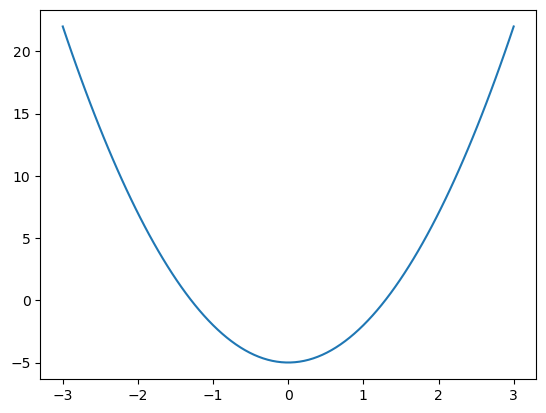

In [417]:
def g(x):
    return 3*x**2-5

x = np.linspace(-3,3,100)
plt.plot(x,g(x))
g(x1),g(x2)

In [418]:
# 第二问

def NewtonRaphson(x0,n):
   '''x0为一开始猜测的根，n为最终迭代次数'''
   x = x0
   for i in range(n):
      x = x-f(x)/g(x)
   return x 

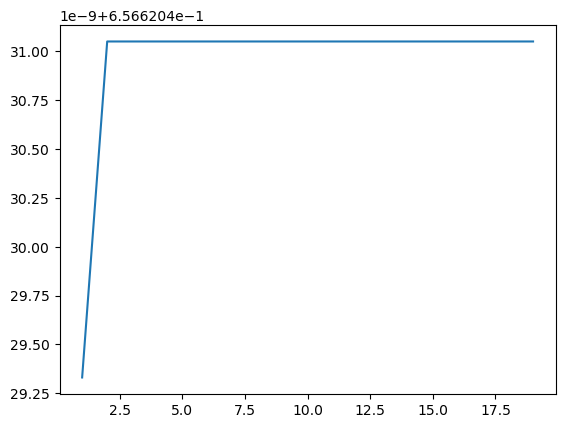

In [419]:
x1_array = np.array([])
x2_array = np.array([])
n_array = np.arange(1,20)

for n in n_array:
    x1_array = np.append(x1_array,NewtonRaphson(x1,n))
    x2_array = np.append(x2_array,NewtonRaphson(x2,n))
    
plt.plot(n_array,x1_array)
#plt.plot(n_array,x2_array)


In [420]:
x1 = NewtonRaphson(x1,20)
x2 = NewtonRaphson(x2,20)
x1,x2,f(x1),f(x2)

(0.6566204310471104, 1.834243184313922, 0.0, 8.881784197001252e-16)

In [421]:
# 第三题Newt-Safe求根
def NewtSafe(a,b,epsilon):
    '''a,b分别为求根区间的两个边界，epsilon为f(x)=0所允许的误差范围'''
    x1,x2 = min(a,b),max(a,b)
    if f(x1)*f(x2)<0:
        x = 0.5*(x1+x2)
        
        while np.abs(f(x))>epsilon:#当在误差允许范围内发f(x)不等于0时，持续迭代

            if g(x) == 0:#若x处导数为0，则使用二分法迭代
                x1 = x1 if f(x1)*f(x)<0 else x
                x2 = x if f(x1)*f(x)<0 else x2
                x = 0.5*(x1+x2)
            else: #若x处导数不为0，则使用牛顿法迭代
                x = x-f(x)/g(x)
        
        else:
            pass    
        return x
    else:
        print(x1,f(x1),x2,f(x2))
        return None
        

In [422]:
x1 = NewtSafe(0,1,1e-15) 
x2 = NewtSafe(1,2,1e-15) 

x1,x2,f(x1),f(x2)

(0.6566204310471104, 1.834243184313922, 0.0, 8.881784197001252e-16)

# T2
定义
$$h(x,y)\equiv \sin(x+y)+\cos(x+2y)$$
其在x和y方向上的周期均为$2\pi$，因此只在$(x,y)\in [0,2\pi)^2$的范围内对最小值进行搜寻
对$\frac{\partial h }{\partial x}=\frac{\partial h }{\partial y} = 0$进行求解,易得在该范围中的极值点分别为$(0,1.5\pi)$和$(\pi,1.5\pi)$,其中第一个为极小值点，第二个为极大值点

第一种方法就是直接算出各个点的h值，然后找出h最小的那个点

In [423]:
1.5*np.pi

4.71238898038469

In [424]:
x = np.linspace(0,2*np.pi,1000)
y = np.linspace(0,2*np.pi,1000)

X,Y  = np.meshgrid(x,y)

def h(x,y):
    return np.sin(x+y)+np.cos(x+2*y)



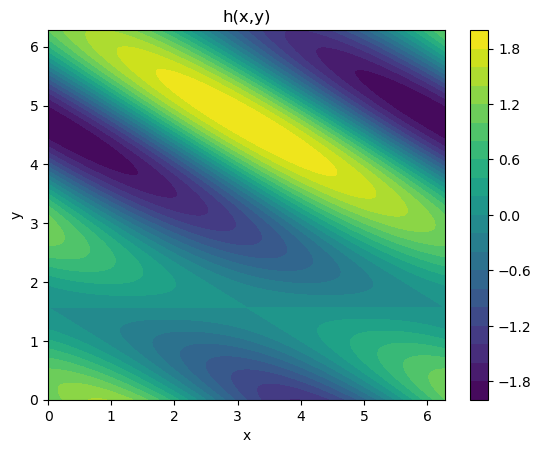

In [425]:
h_xy = h(X,Y)

plt.contourf(X, Y, h_xy, 20, cmap='viridis')  # 绘制等高线图，20表示等高线的数量
plt.colorbar()  # 显示颜色条
plt.xlabel('x')
plt.ylabel('y')
plt.title('h(x,y)')
plt.show()



In [432]:
h_min = np.min(h_xy)
h_min = np.min(h_xy)

X_min = X[np.unravel_index(np.argmin(h_xy), h_xy.shape)[1]][np.unravel_index(np.argmin(h_xy), h_xy.shape)[1]]
Y_min = Y[np.unravel_index(np.argmin(h_xy), h_xy.shape)[0]][np.unravel_index(np.argmin(h_xy), h_xy.shape)[0]]

h_min,X_min,Y_min,1.5*np.pi

(-1.9999938191460434, 0.0, 4.710816611689199, 4.71238898038469)

第二种方法是使用最速下降法。

In [427]:
#先定义梯度函数
def nabla_h(x,y):
    return (np.cos(x+y)-np.sin(x+2*y),np.cos(x+y)-2*np.sin(x+2*y))

def SteepestDescent(x0,y0,a,epsilon):
    '''(x0,y0)为迭代的开始点，a为最小步长，epsilon是梯度为0的最小误差'''
    x = x0
    y = y0
    nabla_h_xy = nabla_h(x,y)
    while np.linalg.norm(nabla_h_xy)>epsilon:
        x = x-(nabla_h_xy[0]/np.linalg.norm(nabla_h_xy[0]))*a
        y = y-(nabla_h_xy[1]/np.linalg.norm(nabla_h_xy[1]))*a
        nabla_h_xy = nabla_h(x,y)
    return x,y

In [430]:
X_min_1,Y_min_1 = SteepestDescent(X_min,Y_min,0.00001,0.00005)
X_min_1,Y_min_1,h(X_min_1,Y_min_1),nabla_h(X_min_1,Y_min_1)

(0.0002800000000000001,
 4.712216611689146,
 -1.9999999921122864,
 (4.289391320650409e-05, -2.1843477835567e-05))

# T3

In [362]:
# 先定义对奇数偶数不同的两种f(x)
def f_even(E):

    V0 = 1.6e-18 #单位为焦耳
    a = 0.2 # a = 0.2nm
    # 时间单位为s的话
 
    m = 9.109e-31 
    hbar = 1.054e-34
    
    # 以上均使用国际单位制
    
    alpha = (np.sqrt(2*m*E)/hbar)/10**9
    beta = (np.sqrt(2*m*(V0-E))/hbar)/10**9

    return alpha*np.sin(alpha*a)-beta*np.cos(alpha*a)

def f_odd(E):

    V0 = 1.6e-18
    a = 0.2 

    m = 9.109e-31
    hbar = 1.054e-34
    
    alpha = (np.sqrt(2*m*E)/hbar)*10**-9
    beta = (np.sqrt(2*m*(V0-E))/hbar)*10**-9

    return alpha*np.sin(alpha*a)+beta*np.cos(alpha*a)


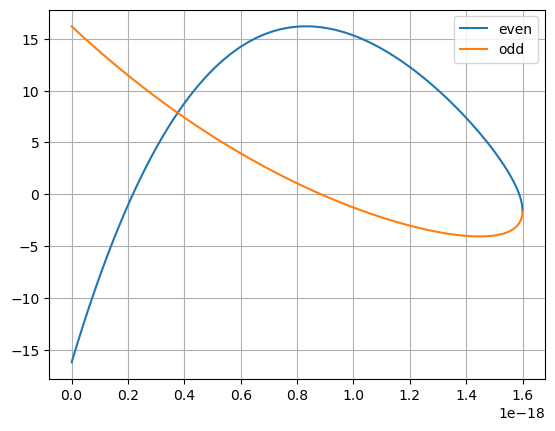

In [363]:
E_array = np.linspace(0,1.6e-18,1000)
f_even_array = f_even(E_array)
f_odd_array = f_odd(E_array)
plt.grid(True)
plt.plot(E_array,f_even_array,label='even')
plt.plot(E_array,f_odd_array,label='odd')

plt.legend()

能量最低的三个本征态中有两个是偶数态（0.2到0.3之间）和（1.5到1.6之间），一个为奇数态（0.8到0.9之间），考虑原函数导数较为难算外加无法对根精确估值，使用二分法对根进行估计

In [364]:
def NewtSafeForf_even(a,b,epsilon):
    x1 = min(a,b)
    x2 = max(a,b)
    x = 0.5*(x1+x2)
    h = 1e-24
    while np.abs(f_even(x))>epsilon:
        if f_even(x+h)-f_even(x) == 0:
            x1 = x1 if f_even(x1)*f_even(x)<0 else x
            x2 = x if f_even(x1)*f_even(x)<0 else x2
            x = 0.5*(x1+x2)
        else:
            x = x-(h*f_even(x))/(f_even(x+h)-f_even(x))

    return x

def NewtSafeForf_odd(a,b,epsilon):
    x1 = min(a,b)
    x2 = max(a,b)
    x = 0.5*(x1+x2)
    h = 1e-23
    while np.abs(f_odd(x))>epsilon:
        if f_odd(x+h)-f_odd(x) == 0 and x+h <1.6e-18 :
            x1 = x1 if f_odd(x1)*f_odd(x)<0 else x
            x2 = x if f_odd(x1)*f_odd(x)<0 else x2
            x = 0.5*(x1+x2)
        else:
            x = x-(h*f_odd(x))/(f_odd(x+h)-f_odd(x))
    return x

In [365]:
E1 = NewtSafeForf_even(0.2e-18,0.3e-18,0.00001)
print(E1,f_even(E1))
E2 = NewtSafeForf_odd(0.8e-18,0.9e-18,0.00001)
print(E2,f_odd(E2))
E3 = NewtSafeForf_even(1.5e-18,1.6e-18,0.00001)
print(E3,f_even(E3))

2.1715444818719253e-19 -8.526956918331052e-11
8.85008319579106e-19 3.184536513600733e-06
1.5881749557790007e-18 -8.999037150569933e-06


In [366]:
E1/1.6e-19,E2/1.6e-19,E3/1.6e-19

(1.3572153011699533, 5.531301997369413, 9.926093473618755)

下面计算其对应的波函数$\psi$

In [367]:
def GetPsi(x,E,num):
    '''E代表该波函数对应的本征能量，num为0或1对应为奇函数还是偶函数'''
    # 先规定一些常数
    V0 = 1.6e-18 #单位为焦耳
    a = 0.2 # a = 0.2nm
    # 时间单位为s的话
 
    m = 9.109e-31 
    hbar = 1.054e-34
    
    # 以上均使用国际单位制
    
    alpha = np.sqrt(2*m*E)/hbar*10**-9
    beta = np.sqrt(2*m*(V0-E))/hbar*10**-9
    
    # 我们暂且不做归一化,保留参数C作为归一化系数
    C =  1
    if not num:
        B = (C*np.exp(-beta*a))/np.cos(alpha*a)
        if x <= -a:
            psi = C*np.exp(beta*x)
        elif x >= a:
            psi = C*np.exp(-beta*x)
        else:
            psi = B*np.cos(alpha*x)
    if num:
        A = -(C*np.exp(-beta*a))/np.sin(alpha*a)
        if x <= -a:
            psi = C*np.exp(beta*x)
        elif x >= a:
            psi = -C*np.exp(-beta*x)
        else:
            psi = A*np.sin(alpha*x)
    return psi

In [368]:
lim = 0.5 # 波函数的上下限，单位nm

x_array = np.linspace(-lim,lim,1000)
psiE1_array = np.array([])
psiE2_array = np.array([])
psiE3_array = np.array([])

for x in x_array:
    psiE1_array = np.append(GetPsi(x,E1,0),psiE1_array)
    psiE2_array = np.append(GetPsi(x,E2,1),psiE2_array)
    psiE3_array = np.append(GetPsi(x,E3,0),psiE3_array)

 

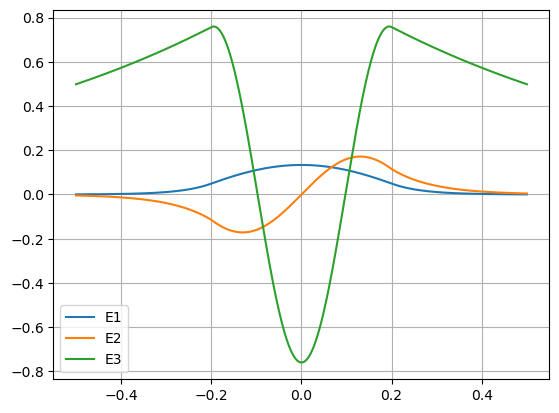

In [369]:
plt.plot(x_array,psiE1_array,label = 'E1')
plt.plot(x_array,psiE2_array,label = 'E2')
plt.plot(x_array,psiE3_array,label = 'E3')
plt.legend()
plt.grid(True)

In [370]:
# 在这里再进行归一化，但其实对函数走势没有影响
psiE1_array = psiE1_array**2/np.sum(psiE1_array**2)
psiE2_array = psiE2_array**2/np.sum(psiE2_array**2)
psiE3_array = psiE3_array**2/np.sum(psiE3_array**2)

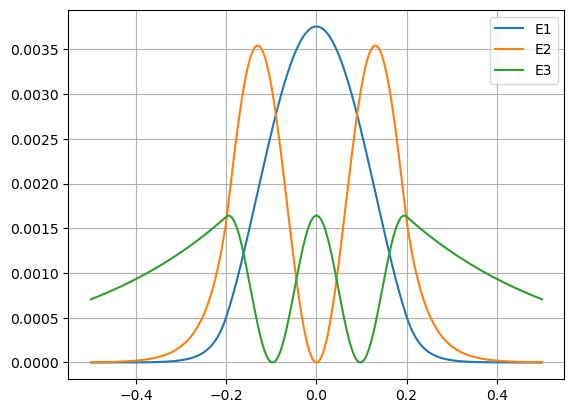

In [371]:
# 注意，这里画出来的就是平方后的了


plt.plot(x_array,psiE1_array,label = 'E1')
plt.plot(x_array,psiE2_array,label = 'E2')
plt.plot(x_array,psiE3_array,label = 'E3')
plt.legend()
plt.grid(True)